In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Both datasets contain data on mostly the same movies.
df1=pd.read_csv('./dataset/tmdb_5000_movies.csv')
# Cleaner dataset
#   'genres' feature in this dataset is parsed into JASON like fields.
# 'revenue' feature in this dataset is world wide revenue.
df2=pd.read_csv('./dataset/movie_metadata.csv')
# Clean features:
#   title_year: already parsed
#   genres, country: already string-form like, easy to encode
#   language: the main spoken language
# Useful actors and director features
#   actors,directors' name
#   facebook_likes: Even if the actor/director doesn’t have a personal account (like DiCaprio),
#   the number reflects their popularity across Facebook pages, fan tags, or search interest.
# 'gross' feature in this dataset is U.S. domestic gross, not world wide revenue.

actor_tier=pd.read_csv('./dataset/actor_tiers.csv')
director_tier=pd.read_csv('./dataset/director_tiers.csv')
# I asked chat gpt to put actors & directors in 'movie_metadata.csv' into three classes: 1, 2 and 3

Data Exploration

In [4]:
print(df1.shape)
print(df2.shape)

(4803, 20)
(5043, 28)


In [5]:
print(actor_tier.shape)
print(director_tier.shape)

(6255, 2)
(2398, 2)


In [6]:
df1.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [7]:
df2.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
df1.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [9]:
df2.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000


In [10]:
actor_tier.head(1)

,actor_name,tier
0,Robert De Niro,1


In [11]:
director_tier.head(2)

,director_name,tier
0,Steven Spielberg,1
1,Woody Allen,1


Pre-processing and Visualization

In [12]:
# We will keep the Numerical features, and the features that requires Low text-processing
# and drop the features that doesn't serve our purpose, or the text-heavy features that requires NLP
# We dropped features like (imdb-score) because we want to predict success of movies that are yet not released
# We dropped df2's 'budget' and kept df1's budget
# We dropped df1's 'title' and kept 'original_title' 
# facebook_likes values in df2 don't indicate actor/director real popularity
df1_deleted_features=['original_language','vote_count','vote_average','popularity','keywords','homepage','title','tagline','id','overview','production_countries',
                      'status','release_date','spoken_languages','production_companies','genres']

#keeping productino companies & popularity
# df1_deleted_features=['original_language','vote_count','vote_average','keywords','homepage','title','tagline','id','overview','production_countries',
#                       'status','release_date','spoken_languages','genres']
df2_deleted_features=['actor_3_facebook_likes','director_facebook_likes','color','num_critic_for_reviews','gross','num_voted_users',
                      'cast_total_facebook_likes','facenumber_in_poster','plot_keywords','movie_imdb_link','num_user_for_reviews','budget',
                      'imdb_score','aspect_ratio','movie_facebook_likes','duration','actor_2_facebook_likes','actor_1_facebook_likes']


df1.drop(columns=df1_deleted_features,inplace=True)
df2.drop(columns=df2_deleted_features,inplace=True)

df1.rename(columns={'original_title':'title'},inplace=True)
df2.rename(columns={'movie_title':'title'},inplace=True)
df2.rename(columns={'title_year':'year'},inplace=True)

#df2's titles are followed by NBSP (non-breaking space) character \xa0
df2['title'] = df2['title'].str.replace('\xa0', '')


df1 = df1.drop(df1[df1['title'].duplicated()].index)
df2 = df2.drop(df2[df2['title'].duplicated()].index)

#merging the two datasets
df=pd.merge(df1,df2,on='title')

#by the way, merging the datasets cleaned some of the outliers

In [13]:
df.shape

(4386, 13)

In [14]:
df.head(1)

,budget,title,revenue,runtime,director_name,actor_2_name,genres,actor_1_name,actor_3_name,language,country,content_rating,year
0,237000000,Avatar,2787965087,162.0,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,PG-13,2009.0


<function matplotlib.pyplot.show(close=None, block=None)>

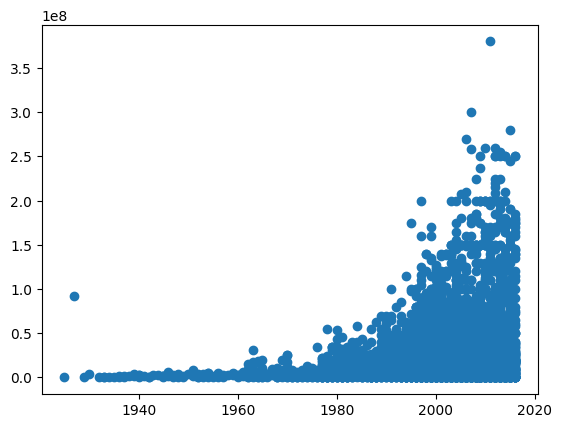

In [15]:
plt.scatter(df['year'],df['budget'])
plt.title="year/budget"
plt.show

In [16]:
# We will drop movies released before 2012, because they existed in a very different ecosystem
# - Less influence from social media
# - no Netflex/streaming platforms
# - Less global distribution
df.drop(df.loc[df['year']<2012].index,inplace=True)
df.drop('year',axis=1,inplace=True)
df.shape

(893, 12)

In [17]:
df['language'].value_counts()

language
English       866
Hindi           6
French          5
Hebrew          3
Spanish         3
Telugu          1
Russian         1
Portuguese      1
Japanese        1
Polish          1
Arabic          1
Urdu            1
Swahili         1
Name: count, dtype: int64

In [18]:
# we will keep only 'American' 'English' movies:
df.drop(df.loc[df['language']!='English'].index,inplace=True)
df.drop(df.loc[df['country']!='USA'].index,inplace=True)
df.drop('language',axis=1,inplace=True)
df.drop('country',axis=1,inplace=True)
df.shape

(701, 10)

<Axes: >

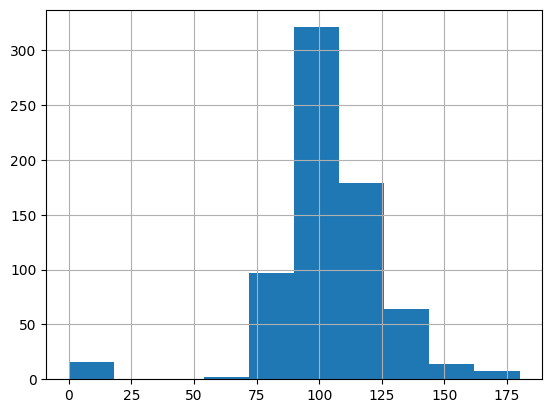

In [19]:
df['runtime'].hist()

In [20]:
# Dropping movies with runtime < 75 (to keep only mainstream films)
indexes=df['runtime'][(df['runtime']<75)].index
df.drop(indexes,inplace=True)

<Axes: >

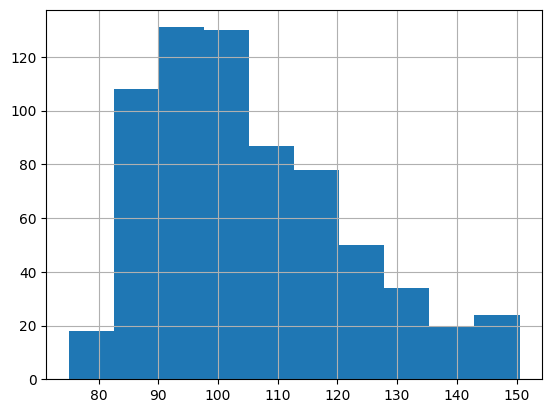

In [21]:
# Flooring and Capping runtime outliers
Q1=df['runtime'].quantile(0.25)
Q3=df['runtime'].quantile(0.75)
IQR=Q3-Q1
th=1.5
lower_wh=Q1-(th*IQR)
upper_wh=Q3+(th*IQR)
df['runtime']=np.where(df['runtime']>upper_wh,upper_wh,np.where(df['runtime']<lower_wh,lower_wh,df['runtime']))
df['runtime'].hist()

In [22]:
df.loc[df['budget']<1000000,'budget'].value_counts()

budget
0         121
500000      4
1           3
50000       3
700000      2
750000      2
250         1
60000       1
75000       1
100000      1
200         1
225000      1
350000      1
250000      1
300000      1
15          1
650         1
850000      1
913000      1
950000      1
22000       1
Name: count, dtype: int64

In [23]:
df.loc[df['budget']==0].head(2)

,budget,title,revenue,runtime,director_name,actor_2_name,genres,actor_1_name,actor_3_name,content_rating
312,0,The Campaign,104907746,85.0,Jay Roach,Thomas Middleditch,Comedy,Will Ferrell,Katherine LaNasa,R
349,0,Alvin and the Chipmunks: The Road Chip,233755553,92.0,Walt Becker,Joshua Mikel,Adventure|Animation|Comedy|Family|Fantasy|Music,Bella Thorne,Jesse McCartney,PG


In [24]:
df.loc[df['budget']==1].head()

,budget,title,revenue,runtime,director_name,actor_2_name,genres,actor_1_name,actor_3_name,content_rating
3903,1,Me You and Five Bucks,0,90.0,Jaime Zevallos,Jaime Zevallos,Comedy|Drama|Romance,Angela Sarafyan,Michael Elian,NaN
3939,1,The Algerian,0,99.0,Giovanni Zelko,Harry Lennix,Action|Romance|Thriller,Zuhair Haddad,Ben Youcef,NaN
4056,1,Fear Clinic,0,95.0,Robert Hall,Kevin Gage,Horror,Angelina Armani,Fiona Dourif,R


In [25]:
# Filling missing values with the mean
print(df['budget'][(df['budget']<10)].value_counts())
# budget_mean=df['budget'].mean()
df['budget'].replace(0,df['budget'].mean(),inplace=True)
# df['budget'].replace(1,budget_mean,inplace=True)
print(df['budget'][(df['budget']<10)].value_counts())
df.drop(df.loc[df['budget']<100000].index,inplace=True)
# df.loc[df['budget']<1000000,'budget'].value_counts()
df['budget'].min()

budget
0    121
1      3
Name: count, dtype: int64
budget
1.0    3
Name: count, dtype: int64


100000.0

<Axes: >

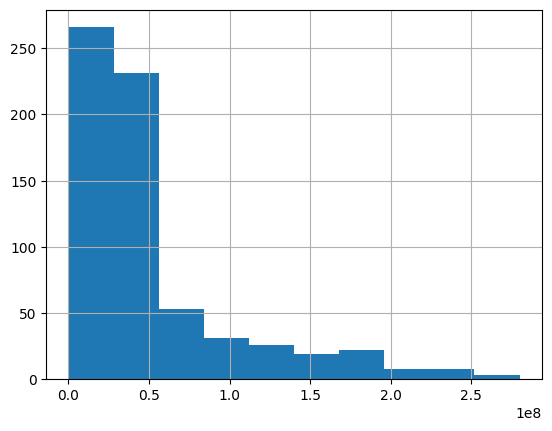

In [26]:
df['budget'].hist()

In [27]:
df.loc[df['revenue']<500000,'revenue'].value_counts()

revenue
0         165
73706       1
66351       1
32251       1
187112      1
3330        1
187674      1
336472      1
343341      1
316472      1
258384      1
319285      1
56825       1
111300      1
Name: count, dtype: int64

In [28]:
# Filling missing values with the mean
print(df['revenue'][(df['revenue']<10)].value_counts())
df['revenue'].replace(0,df['revenue'].mean(),inplace=True)
print(df['revenue'][(df['revenue']<10)].value_counts())
# df.drop(df.loc[df['revenue']<500000].index,inplace=True)
df['revenue'].min()

revenue
0    165
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


3330.0

In [29]:
df['successful'] = ((df['revenue'] - df['budget']) >= 0).astype(int)
df['successful'].value_counts()

successful
1    565
0    102
Name: count, dtype: int64

In [30]:
# import ast  # safer than eval for converting string to list/dict

# def extract_production_company(json_string):
#     try:
#         companies = ast.literal_eval(json_string)
#         if isinstance(companies, list) and len(companies) > 0:
#             return companies[0]['name']
#     except (ValueError, SyntaxError, KeyError, TypeError):
#         return None

# df['main_production_company'] = df['production_companies'].apply(extract_production_company)

# company_counts = df['main_production_company'].value_counts()

# x = df[df['main_production_company'].isin(company_counts[company_counts == 1].index)]

# #x.shape

# print(x['main_production_company'].value_counts())
# df.drop('production_companies',axis=1,inplace=True)


In [31]:
df['budget'].min()

100000.0

<Axes: >

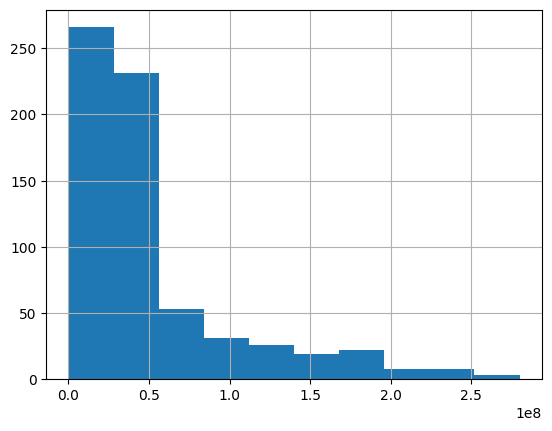

In [32]:
df['budget'].hist()

78


<Axes: >

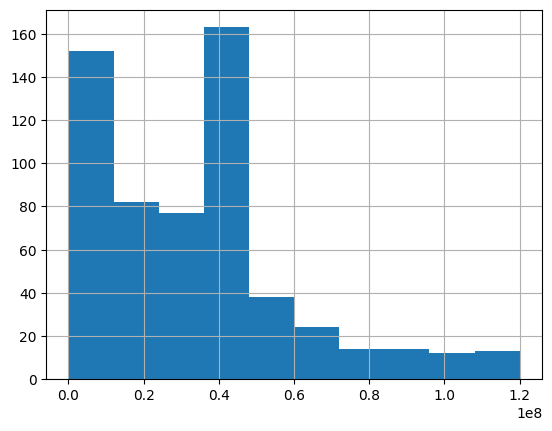

In [33]:
# Trimming budget outliers
# all of them are movies with high budget that will most probably succeed
# by dropping them we decrease bias.
Q1=df['budget'].quantile(0.25)
Q3=df['budget'].quantile(0.75)
IQR=Q3-Q1
th=1.5
lower_wh=Q1-(th*IQR)
upper_wh=Q3+(th*IQR)
indexes=df['budget'][(df['budget']>upper_wh)|(df['budget']<lower_wh)].index
df.drop(indexes,inplace=True)
print(len(indexes))



# # Flooring and Capping budget outliers
# Q1=df['budget'].quantile(0.25)
# Q3=df['budget'].quantile(0.75)
# IQR=Q3-Q1
# th=1.5
# lower_wh=Q1-(th*IQR)
# upper_wh=Q3+(th*IQR)
# df['budget']=np.where(df['budget']>upper_wh,upper_wh,np.where(df['budget']<lower_wh,lower_wh,df['budget']))
# print(lower_wh)
df['budget'].hist()

<Axes: >

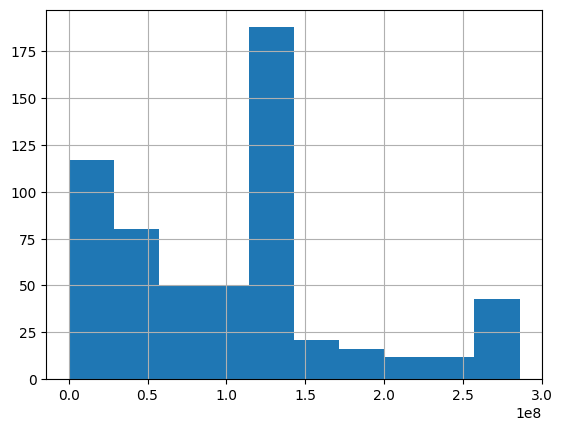

In [34]:
# Flooring and Capping revenue outliers
Q1=df['revenue'].quantile(0.25)
Q3=df['revenue'].quantile(0.75)
IQR=Q3-Q1
th=1.5
lower_wh=Q1-(th*IQR)
upper_wh=Q3+(th*IQR)
df['revenue']=np.where(df['revenue']>upper_wh,upper_wh,np.where(df['revenue']<lower_wh,lower_wh,df['revenue']))
df['revenue'].hist()

In [35]:
# there is no missing values in 'genres'
df['genres'].isnull().sum()

0

In [36]:
# Encoding genres and also treating some of its outliers:


# by taking only the MAIN genre where there are multiple    
    
df['main_genre'] = df['genres'].str.split('|').str[0]


df.drop('genres',axis=1,inplace=True)
df['main_genre'].head()  


169    Adventure
197    Adventure
209    Adventure
215       Action
217       Action
Name: main_genre, dtype: object

In [37]:
df['main_genre'].value_counts()

main_genre
Comedy         155
Action         134
Drama          106
Adventure       44
Horror          41
Crime           33
Biography       31
Documentary     13
Fantasy          7
Thriller         7
Animation        6
Family           6
Mystery          3
Sci-Fi           2
Western          1
Name: count, dtype: int64

In [38]:
# the unpopular genres are:
rare_genres=['Documentary','Fantasy','Thriller','Animation','Family','Mystery','Sci-Fi','Western']
df['main_genre']=df['main_genre'].replace(rare_genres,'Unpopular')
df['main_genre'].value_counts()

main_genre
Comedy       155
Action       134
Drama        106
Unpopular     45
Adventure     44
Horror        41
Crime         33
Biography     31
Name: count, dtype: int64

<Axes: ylabel='count'>

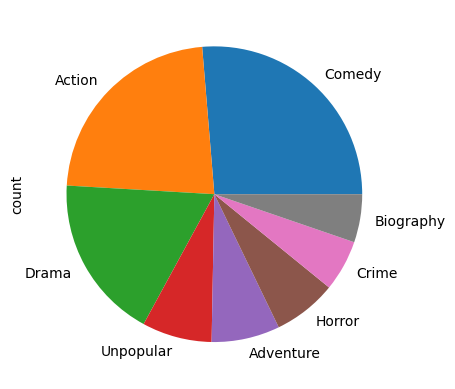

In [39]:
df['main_genre'].value_counts().plot.pie()

In [40]:
# Encoding genres:

# Using a set to store only unique genres
genres = set()

for i in range(df.shape[0]):
    genres.add(df.iloc[i]['main_genre'])  



genres = pd.Series(list(genres))

# Create a dictionary to map genres to unique IDs
genres_ids = {genres[i]: i for i in range(len(genres))}
print(genres_ids)

{'Action': 0, 'Biography': 1, 'Comedy': 2, 'Unpopular': 3, 'Horror': 4, 'Crime': 5, 'Drama': 6, 'Adventure': 7}


In [41]:
def genre_id(x):
    return genres_ids[x]

    
    
df['main_genre']=df['main_genre'].apply(genre_id)
df['main_genre'].head()

169    7
197    7
209    7
215    0
217    0
Name: main_genre, dtype: int64

<Axes: >

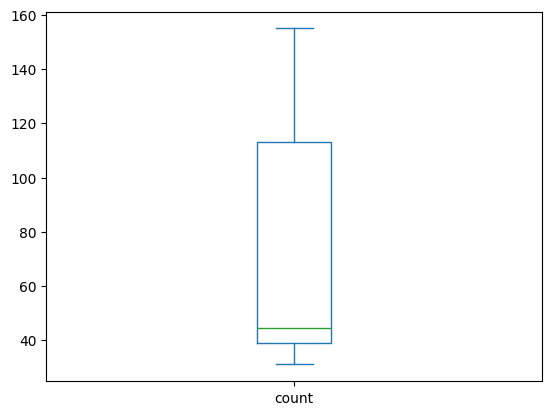

In [42]:
df['main_genre'].value_counts().plot.box()

In [43]:
df['content_rating'].value_counts()

content_rating
R            269
PG-13        187
PG            63
Not Rated     15
G              3
TV-14          2
Unrated        2
Name: count, dtype: int64

In [44]:
df['content_rating'] = df['content_rating'].replace('Not Rated', 'Unrated')
df['content_rating'].value_counts()

content_rating
R          269
PG-13      187
PG          63
Unrated     17
G            3
TV-14        2
Name: count, dtype: int64

In [45]:
# content-rating outliers Treatement:

# we will replace 'Unrated' with the median content-rating which is PG-13
df['content_rating'] = df['content_rating'].replace('Unrated', 'PG-13')

# and replace 'G' (general, all ages admitted) with PG (parental guidance)
df['content_rating'] = df['content_rating'].replace('G', 'PG')

# replace TV-14 with PG-13
df['content_rating'] = df['content_rating'].replace('TV-14', 'PG-13')
df['content_rating'].value_counts()


content_rating
R        269
PG-13    206
PG        66
Name: count, dtype: int64

In [46]:
#content_rating missing values:
df['content_rating'].isnull().sum()

48

In [47]:
# We can replace content-rating missing values again with the median content_rating PG-13
df['content_rating'] = df['content_rating'].fillna('PG-13')
df['content_rating'].isnull().sum()

0

<Axes: ylabel='count'>

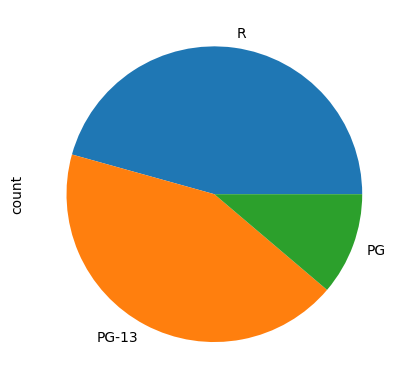

In [48]:
df['content_rating'].value_counts().plot.pie()

In [49]:
# Encoding content_rating:

# Using a set to store only unique ratings
content_ratings = set()

for i in range(df.shape[0]):
    if pd.notna(df.iloc[i]['content_rating']):
        content_ratings.add(df.iloc[i]['content_rating'])  



content_ratings = pd.Series(list(content_ratings))

# Create a dictionary to map content_ratings to unique IDs
content_ratings_ids = {content_ratings[i]: i for i in range(len(content_ratings))}
print(content_ratings_ids)

{'PG-13': 0, 'PG': 1, 'R': 2}


In [50]:
# replacing the content-rating with its id:

def content_rating_replacer(x):
    return content_ratings_ids[x]

df['content_rating']=df['content_rating'].apply(content_rating_replacer)
df.head(1)

,budget,title,revenue,runtime,director_name,actor_2_name,actor_1_name,actor_3_name,content_rating,successful,main_genre
169,120000000.0,The Twilight Saga: Breaking Dawn - Part 2,2.858259e+08,115.0,Bill Condon,Kristen Stewart,Robert Pattinson,Taylor Lautner,0,1,7


In [51]:
# replacing actor's name with his tier:

actor_dict = dict(zip(actor_tier['actor_name'], actor_tier['tier']))
df['actor_1_class'] = df['actor_1_name'].map(actor_dict)
df['actor_2_class'] = df['actor_2_name'].map(actor_dict)
df['actor_3_class'] = df['actor_3_name'].map(actor_dict)
delete=['actor_1_name','actor_2_name','actor_3_name']
df.drop(delete,axis=1,inplace=True)
df.head()

,budget,title,revenue,runtime,director_name,content_rating,successful,main_genre,actor_1_class,actor_2_class,actor_3_class
169,120000000.0,The Twilight Saga: Breaking Dawn - Part 2,2.858259e+08,115.0,Bill Condon,0,1,7,1,1.0,1.0
197,103000000.0,Rio 2,2.858259e+08,102.0,Carlos Saldanha,1,1,7,1,3.0,3.0
209,120000000.0,Life of Pi,2.858259e+08,127.0,Ang Lee,1,1,7,2,1.0,2.0
215,115000000.0,Elysium,2.858259e+08,109.0,Neill Blomkamp,2,1,0,1,1.0,1.0
217,120000000.0,RoboCop,2.426890e+08,102.0,José Padilha,0,1,0,1,1.0,1.0


In [52]:
# replacing director's name with his tier:

actor_dict = dict(zip(director_tier['director_name'], director_tier['tier']))
df['director_class'] = df['director_name'].map(actor_dict)
df.drop('director_name',axis=1,inplace=True)
df.head()


,budget,title,revenue,runtime,content_rating,successful,main_genre,actor_1_class,actor_2_class,actor_3_class,director_class
169,120000000.0,The Twilight Saga: Breaking Dawn - Part 2,2.858259e+08,115.0,0,1,7,1,1.0,1.0,1
197,103000000.0,Rio 2,2.858259e+08,102.0,1,1,7,1,3.0,3.0,1
209,120000000.0,Life of Pi,2.858259e+08,127.0,1,1,7,2,1.0,2.0,1
215,115000000.0,Elysium,2.858259e+08,109.0,2,1,0,1,1.0,1.0,1
217,120000000.0,RoboCop,2.426890e+08,102.0,0,1,0,1,1.0,1.0,1


In [53]:
x=director_tier.loc[director_tier['director_name']=='Christopher Nolan','tier'].index
print(actor_tier.iloc[x]['tier'])

68    1
Name: tier, dtype: int64


In [54]:
print(df['actor_1_class'].isnull().sum())
print(df['actor_2_class'].isnull().sum())
print(df['actor_3_class'].isnull().sum())

print(df['director_class'].isnull().sum())

0
2
2
0


In [55]:
# filling the missing values with the median value (2)
df['actor_1_class'].fillna(2,inplace=True)
df['actor_2_class'].fillna(2,inplace=True)
df['actor_3_class'].fillna(2,inplace=True)

In [56]:
# drop title column
# heading to moduling
df.drop('title',axis=1,inplace=True)
df.head(1)

,budget,revenue,runtime,content_rating,successful,main_genre,actor_1_class,actor_2_class,actor_3_class,director_class
169,120000000.0,2.858259e+08,115.0,0,1,7,1,1.0,1.0,1


In [57]:
# balancing successful/unsuccessful movies
from sklearn.utils import resample

df_majority = df[df.successful == 1]
df_minority = df[df.successful == 0]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])
print(df.shape)
print(df_balanced.shape)

(589, 10)
(982, 10)


<Axes: ylabel='count'>

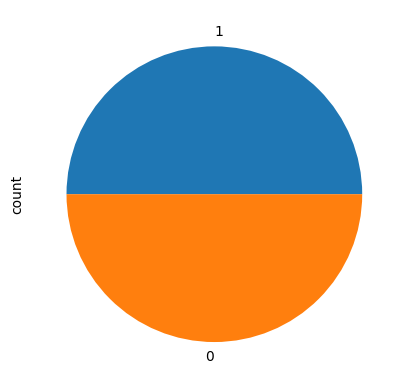

In [58]:
df_balanced['successful'].value_counts().plot.pie()

In [59]:
df.head(1)

,budget,revenue,runtime,content_rating,successful,main_genre,actor_1_class,actor_2_class,actor_3_class,director_class
169,120000000.0,2.858259e+08,115.0,0,1,7,1,1.0,1.0,1


In [60]:
# Rescaling the features so that they have a comparable scale
# This prevents features like budget (millions) from overpowering smaller features like genre or tier values
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# features=['budget','revenue','runtime','content_rating','successful','main_genre','actor_1_class','actor_2_class','actor_3_class','director_class']
# df_scaled=df_balanced
# df_scaled[features]=scaler.fit_transform(df_balanced[features])
# df_scaled.head(100)

Modeling

In [61]:
X=df_balanced.drop(['revenue','successful'],axis=1)
y=df_balanced['successful']
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
# from sklearn.neural_network import MLPClassifier
# clf=MLPClassifier([50,100],max_iter=300)

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
classification_accuracy=accuracy_score(y_test,y_pred)
classification_repo=classification_report(y_test,y_pred)
print(classification_accuracy)
print(classification_repo)

0.8949152542372881
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       148
           1       0.93      0.86      0.89       147

    accuracy                           0.89       295
   macro avg       0.90      0.89      0.89       295
weighted avg       0.90      0.89      0.89       295



The characteristics of last decade's failure movies

In [62]:
x=df.loc[df['successful']==0]
x.head()
x.shape

(98, 10)

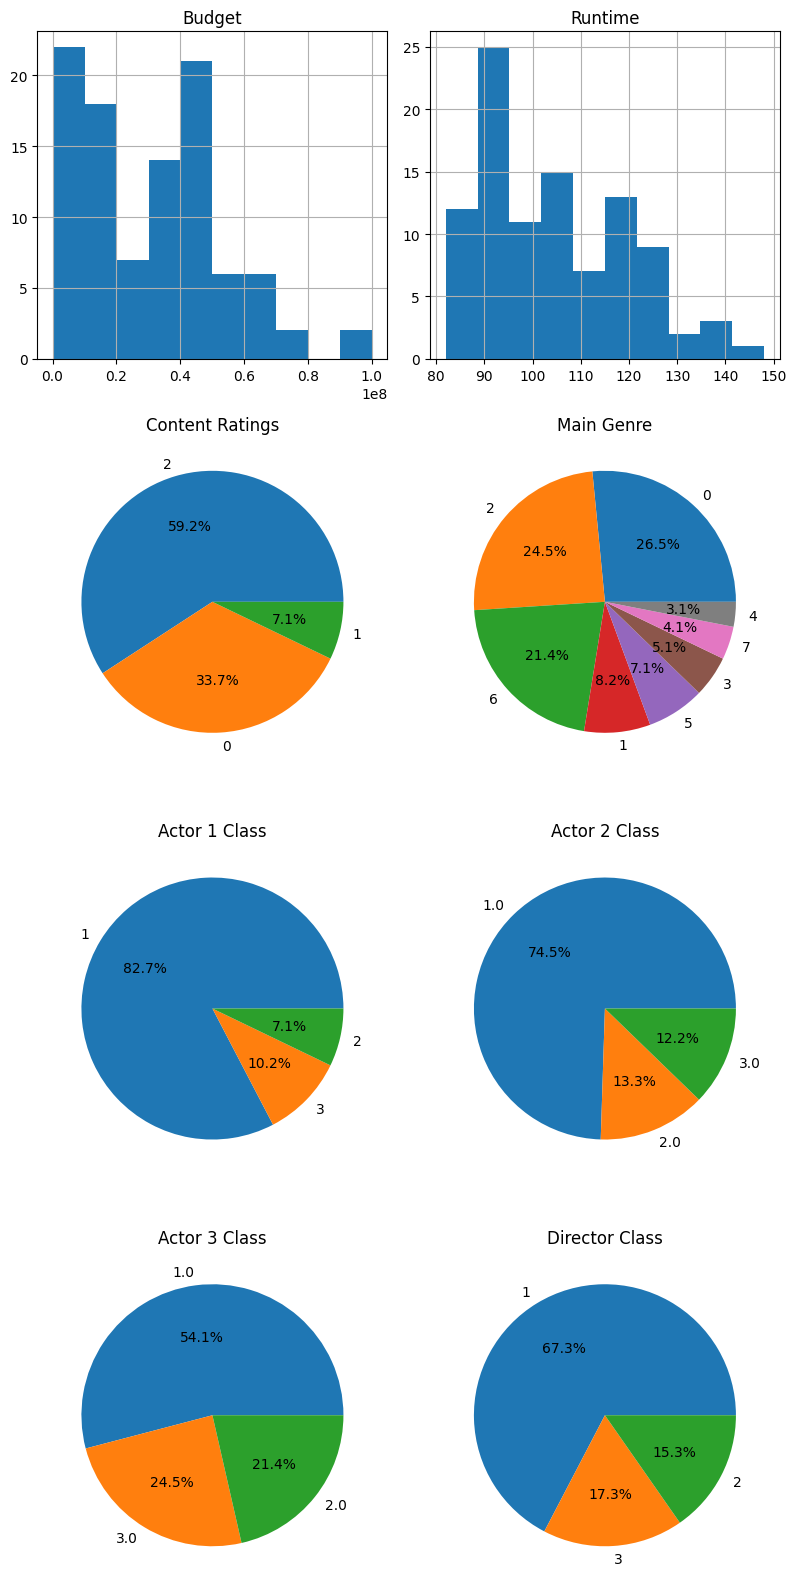

In [63]:

fig, axes = plt.subplots(4, 2, figsize=(8, 16))

# Histogram 1: Budget
x['budget'].hist(ax=axes[0, 0])
axes[0, 0].set_title('Budget')

# Histogram 2: Runtime
x['runtime'].hist(ax=axes[0, 1])
axes[0, 1].set_title('Runtime')

# Pie chart: Content Rating
x['content_rating'].value_counts().plot.pie(ax=axes[1, 0], autopct='%1.1f%%')
axes[1, 0].set_title('Content Ratings')
axes[1, 0].set_ylabel('')  # Remove y-label from pie

x['main_genre'].value_counts().plot.pie(ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title('Main Genre')
axes[1, 1].set_ylabel('')  # Remove y-label from pie

x['actor_1_class'].value_counts().plot.pie(ax=axes[2, 0], autopct='%1.1f%%')
axes[2, 0].set_title('Actor 1 Class')
axes[2, 0].set_ylabel('')  # Remove y-label from pie


x['actor_2_class'].value_counts().plot.pie(ax=axes[2, 1], autopct='%1.1f%%')
axes[2, 1].set_title('Actor 2 Class')
axes[2, 1].set_ylabel('')  # Remove y-label from pie


x['actor_3_class'].value_counts().plot.pie(ax=axes[3, 0], autopct='%1.1f%%')
axes[3, 0].set_title('Actor 3 Class')
axes[3, 0].set_ylabel('')  # Remove y-label from pie

x['director_class'].value_counts().plot.pie(ax=axes[3, 1], autopct='%1.1f%%')
axes[3, 1].set_title('Director Class')
axes[3, 1].set_ylabel('')  # Remove y-label from pie

plt.tight_layout()
plt.show()


In [64]:
indexes=[]
for i in range(len(y_pred)):
    if y_pred[i]==0:
        indexes.append(i)
        
X_test.iloc[indexes].head()

,budget,runtime,content_rating,main_genre,actor_1_class,actor_2_class,actor_3_class,director_class
3012,9.000000e+06,106.0,0,0,3,2.0,2.0,1
1100,4.000000e+07,91.0,0,0,1,1.0,1.0,1
4271,2.250000e+05,86.0,0,3,2,2.0,2.0,2
603,8.000000e+07,114.0,0,0,2,1.0,1.0,1
4188,4.193598e+07,90.0,2,5,1,2.0,2.0,1


In [65]:
print(indexes)

[0, 1, 2, 5, 6, 8, 10, 11, 17, 21, 22, 24, 25, 27, 29, 30, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 48, 52, 57, 60, 62, 68, 69, 70, 71, 75, 78, 79, 80, 83, 86, 87, 88, 89, 91, 92, 94, 95, 98, 99, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 118, 119, 120, 121, 122, 125, 128, 129, 130, 131, 132, 133, 134, 139, 140, 145, 146, 150, 151, 152, 155, 156, 157, 159, 162, 164, 166, 168, 169, 175, 176, 177, 179, 180, 181, 184, 187, 188, 190, 191, 192, 193, 194, 195, 197, 200, 202, 203, 204, 207, 209, 210, 211, 212, 213, 215, 219, 221, 223, 225, 230, 231, 233, 235, 236, 237, 238, 239, 241, 244, 245, 246, 247, 248, 250, 252, 254, 255, 256, 258, 260, 263, 267, 270, 271, 275, 276, 277, 279, 282, 286, 287, 288, 290, 291, 293, 294]


In [66]:
X_test.iloc[25]

budget            25000000.0
runtime                 98.0
content_rating           2.0
main_genre               0.0
actor_1_class            1.0
actor_2_class            1.0
actor_3_class            1.0
director_class           1.0
Name: 1862, dtype: float64

UI

In [67]:
import tkinter as tk
from tkinter import ttk, messagebox

# def load_models():
#     return clf, lm

# Load trained models
classifier =clf
# regressor=lm

# Valid options
tiers = [1,2,3]

# UI setup
root = tk.Tk()
root.title("Movie Success Predictor")
root.geometry("400x600")

# Input variables
budget_var = tk.IntVar()
runtime_var = tk.IntVar()

content_rating_var = tk.StringVar()
genre_var = tk.StringVar()
actor1_var = tk.IntVar()
actor2_var = tk.IntVar()
actor3_var = tk.IntVar()
director_var = tk.IntVar()

error_label = tk.Label(root, text="", fg="red")
classification_label = tk.Label(root, text="", fg="black")
# regression_label = tk.Label(root, text="", fg="black")

# Validation function
def validate_and_predict():
    try:
        budget = int(budget_var.get())
        runtime = int(runtime_var.get())
        if not (100000 <= budget <= 900000000):
            raise ValueError("Budget out of range")
        if not (30 <= runtime <= 230):
            raise ValueError("Runtime out of range")
    except ValueError as e:
        error_label.config(text=str(e))
        return

    error_label.config(text="")  # Clear error

    # Convert inputs to features
    X = np.array([[
        int(budget),
        int(runtime),
        content_ratings_ids[content_rating_var.get()],
        genres_ids[genre_var.get()],
        int(actor1_var.get()),
        int(actor2_var.get()),
        int(actor3_var.get()),
        int(director_var.get())
    ]])
        
    
    if all(isinstance(val, np.int32) for val in X[0][:8]):
        classification_label.config(text='Successful' if clf.predict(X)[0]==1 else 'Failure',fg='green' if clf.predict(X)[0]==1 else 'red')
        # regression_label.config(text=str(lm.predict(X)[0]))

    # Predict
    # success = classifier.predict(X)[0]
    # revenue = regressor.predict(X)[0]
    
    # message = f"Predicted Revenue: ${int(revenue):,}\nSuccess: {'Yes' if success == 1 else 'No'}"
    # messagebox.showinfo("Prediction Result", message)

# Widgets
tk.Label(root, text="Budget (100.000 - 900M)").pack()
tk.Entry(root, textvariable=budget_var).pack()
tk.Label(root, text="Runtime (30 - 230 mins)").pack()
tk.Entry(root, textvariable=runtime_var).pack()

tk.Label(root, text="Content Rating").pack()
tt = ttk.Combobox(root, textvariable=content_rating_var, values=list(content_ratings))
tt.pack()

tk.Label(root, text="Main Genre").pack()
tt = ttk.Combobox(root, textvariable=genre_var, values=list(genres))
tt.pack()

for i, var in enumerate([actor1_var, actor2_var, actor3_var], 1):
    tk.Label(root, text=f"Actor {i} Tier (1-3)").pack()
    tt = ttk.Combobox(root, textvariable=var, values=tiers)
    tt.pack()

tk.Label(root, text="Director Tier (1-3)").pack()
tt = ttk.Combobox(root, textvariable=director_var, values=tiers)
tt.pack()

error_label.pack()
tk.Button(root, text="OK", command=validate_and_predict).pack(pady=20)
classification_label.pack()
# regression_label.pack()

root.mainloop()


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
